1. llamaindex framework
2. Lancedb
3. LLM model(GPT-4V)
4. GEMINI-PRO-VISION

Steps:
1. Download video from YouTube, process and store it.

2. Build Multi-Modal index and vector store for both texts and images.

3. Retrieve relevant images and context, use both to augment the prompt.

4. Using GPT4V for reasoning the correlations between the input query and augmented data and generating final response.

In [ ]:
%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/21.6 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.1/136.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.3/268.3 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
#%pip install llama-index-multi-modal-llms-openai
#%pip install llama-index-vector-stores-lancedb
%pip install llama-index-embeddings-clip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1

In [ ]:
%pip install llama_index ftfy regex tqdm
%pip install -U openai-whisper
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801358 sha256=1e3b9ba7ddccbd91616695c7296fb0b171d101a55c11d87bf8e0def315e58e2a
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-6tu4qxrq
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-6tu4qxrq
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 40.9 MB/s eta 0:00:00


In [ ]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint

In [ ]:
from google.colab import userdata
OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
video_url="https://youtu.be/3dhcmeOTZ_Q"
output_video_path = "/content/video_data/"
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [ ]:
filepath=output_video_path + "input_vid.mp4"

In [ ]:
filepath

'/content/video_data/input_vid.mp4'

In [ ]:
#filepath = output_video_path + "input_vid.mp4"
#Path(output_folder).mkdir(parents=True, exist_ok=True)

In [ ]:
#Path(filepath).mkdir(parents=True,exist_ok=True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break


In [ ]:
from pytube import YouTube
def download_video(url,output_path):
  yt = YouTube(url)
  metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}
  yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="input_vid.mp4"
    )
  return metadata

In [ ]:
from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_flder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2
  )

In [ ]:
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)


In [ ]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text



In [ ]:
video_url

'https://youtu.be/3dhcmeOTZ_Q'

In [ ]:
output_video_path

'/content/video_data/'

In [ ]:
metadata_vid = download_video(video_url, output_video_path)

In [ ]:
metadata_vid

{'Author': '3-Minute Data Science',
 'Title': 'Linear Regression in 3 Minutes',
 'Views': 7126}

In [ ]:
filepath

'/content/video_data/input_vid.mp4'

In [ ]:
output_folder

'/content/mixed_data/'

In [ ]:
!mkdir mixed_data

In [ ]:
filepath

'/content/video_data/input_vid.mp4'

In [ ]:
output_folder

'/content/mixed_data/'

In [ ]:
video_to_images(filepath,output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [ ]:
filepath

'/content/video_data/input_vid.mp4'

In [ ]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [ ]:
video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [ ]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [ ]:
text_data=audio_to_text(output_audio_path)

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 72.9MiB/s]


In [ ]:
text_data

" Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [ ]:
with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
print("Text data saved to file")
file.close()




Text data saved to file


In [ ]:
os.remove(output_audio_path)
print("Audio file removed")

Audio file removed


In [ ]:
# embedding lance db
# llm

In [ ]:
!pip install llama-index-readers-file

In [ ]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [ ]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [ ]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

In [ ]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [ ]:
output_folder

'/content/mixed_data/'

In [ ]:
documents=SimpleDirectoryReader(output_folder).load_data()

In [ ]:
documents

[ImageDocument(id_='ec07a78f-bb87-4b7d-ba2a-9fede5d6fcad', embedding=None, metadata={'file_path': '/content/mixed_data/frame0000.png', 'file_name': 'frame0000.png', 'file_type': 'image/png', 'file_size': 2759, 'creation_date': '2024-04-14', 'last_modified_date': '2024-04-14'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='/content/mixed_data/frame0000.png', image_url=None, image_mimetype=None, text_embedding=None),
 ImageDocument(id_='175fdbed-0254-4a10-b3e8-793e383893e7', embedding=None, metadata={'file_path': '/content/mixed_data/frame0001.png', 'file_name': 'frame0001.png', 'file

In [ ]:
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

100%|███████████████████████████████████████| 338M/338M [00:12<00:00, 28.2MiB/s]


In [ ]:
retriever_engine=index.as_retriever(imilarity_top_k=5, image_similarity_top_k=5)

# RAG

In [ ]:
import json
metadata_str=json.dumps(metadata_vid)

In [ ]:
qa_tmpl_str=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [ ]:
qa_tmpl_str2=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [ ]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [ ]:
query_str="what is a O'Reilly platform.?"

In [ ]:
retrieval_results=retriever_engine.retrieve(query_str)

In [ ]:
retrieval_results

[NodeWithScore(node=TextNode(id_='18bb3a3e-943b-4aea-8189-d1b262781654', embedding=[-0.011831889860332012, 0.0038376476150006056, -0.001850233180448413, -0.011338036507368088, -0.010082827880978584, 0.0011677560396492481, 0.0016093084122985601, 0.00849838275462389, -0.03259428218007088, -0.042553648352622986, -0.006865925621241331, 0.025419699028134346, -0.001395819941535592, 0.02853371575474739, 0.007867349311709404, -0.016804711893200874, 0.02399301342666149, 0.010727579705417156, 0.0436236634850502, -0.020138218998908997, -0.030728617683053017, 0.012943058274686337, -0.013231138698756695, -0.01629714109003544, -0.014417757280170918, -0.019520903006196022, 0.030344508588314056, -0.019685519859194756, 0.006968811620026827, -0.0025601466186344624, 0.012744145467877388, -0.006931086536496878, -0.009931928478181362, -0.019891291856765747, -0.010508089326322079, -0.02037142775952816, 0.011777017265558243, -0.001055438886396587, 0.023869551718235016, -0.01819024421274662, 0.021263105794787

In [ ]:
retrieved_image=[]
retrieved_text=[]

In [ ]:
for res_node in retrieval_results:
  if isinstance(res_node.node,ImageNode):
    retrieved_image.append(res_node.node.metadata["file_path"])
  else:
     display_source_node(res_node, source_length=200)
     retrieved_text.append(res_node.text)




**Node ID:** 18bb3a3e-943b-4aea-8189-d1b262781654<br>**Similarity:** 0.7483672499656677<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [ ]:
retrieved_image

['/content/mixed_data/frame0003.png',
 '/content/mixed_data/frame0038.png',
 '/content/mixed_data/frame0028.png']

In [ ]:
retrieved_text

["Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [ ]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [ ]:
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** 18bb3a3e-943b-4aea-8189-d1b262781654<br>**Similarity:** 0.5568584203720093<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [ ]:
output_folder

'/content/mixed_data/'

In [ ]:
img

['/content/mixed_data/frame0040.png',
 '/content/mixed_data/frame0044.png',
 '/content/mixed_data/frame0042.png',
 '/content/mixed_data/frame0045.png',
 '/content/mixed_data/frame0041.png']

In [ ]:
image_documents = SimpleDirectoryReader(input_dir=output_folder, input_files=img).load_data()

In [ ]:
image_documents2 = SimpleDirectoryReader(input_files=img).load_data()

In [ ]:
context_str = "".join(txt)

In [ ]:
context_str

"Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear reg

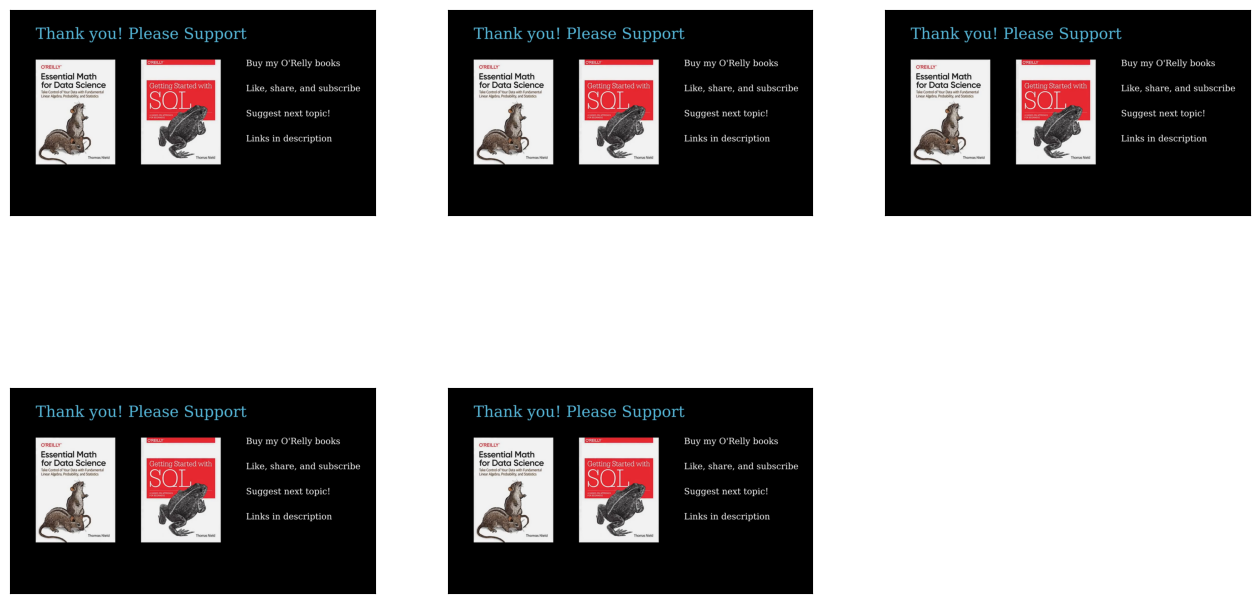

In [ ]:
plot_images(img)

In [ ]:
qa_tmpl_str2

'Given the provided information, including relevant images and retrieved context from the video,     accurately and precisely answer the query without any additional prior knowledge.\n---------------------\nMetadata for video: {metadata_str} \n---------------------\nQuery: {query_str}\nAnswer: '

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [ ]:
openai_mm_llm = OpenAIMultiModal(model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=1500)

In [ ]:
result=openai_mm_llm.complete(
    prompt=qa_tmpl_str2.format(
        query_str=query_str,metadata_str=metadata_str
    ),
    image_documents=image_documents2,
)

In [ ]:
pprint(result.text)

("The O'Reilly platform refers to O'Reilly Media, a learning company that "
 'offers a variety of educational books, courses, and conferences. The image '
 "shows two books with the O'Reilly logo, which is known for featuring "
 "illustrations of animals on the covers of their technical books. O'Reilly "
 'Media is well-known in the technology and data science community for '
 'publishing books on programming, technology, and data science topics.')


In [ ]:
result2=openai_mm_llm.complete(
    prompt="what is O'Reilly?",
    image_documents=image_documents2
)
print(result2.text)

O'Reilly is a publishing company known for producing books on computer technology, programming, and IT topics. They are recognized for their distinctive cover designs, which often feature various animals on a white background. The image you've shown includes two O'Reilly book covers, "The Essential Math for Data Science" and "Getting Started with SQL," by Thomas Nield. The slide appears to be from a presentation, encouraging viewers to support the author by buying his books, sharing, subscribing, and suggesting topics for future content. The slide also mentions that links are provided in the description, which is typical for video content platforms like YouTube.


In [ ]:
result3=openai_mm_llm.complete(
    prompt="just tell me what you are seeing over the pecific ocean?",
    image_documents=image_documents2
)
pprint(result3.text)

#real time system

#sattalites

#just tell me what you are seeing over the pecific ocean?

("Sorry, I can't provide real-time or current information about specific "
 'locations such as the Pacific Ocean. However, I can show you the image you '
 "provided, which appears to be a slide or graphic promoting O'Reilly books "
 'authored by Thomas Nield. The slide encourages viewers to support the author '
 'by buying his books, liking, sharing, and subscribing, and suggests that '
 'viewers can propose the next topic or find links in the description. The '
 'books shown are "Essential Math for Data Science" and "Getting Started with '
 'SQL."')


In [ ]:
realtime idea:

sunny.savita@ineuron.ai